
# **Histogram Visualization and Tonal Adjustment**

1. Histogram Visualization
2. Tonal Adjustment
3. Histogram Equalization

## Imports

In [1]:
import os
import cv2
import numpy as np
from matplotlib import pyplot as plt

## Imshow Function for Displaying Images

In [2]:
def imshow(title = "Image", image = None, size = 6):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

##  **1. Histogram Visualization**

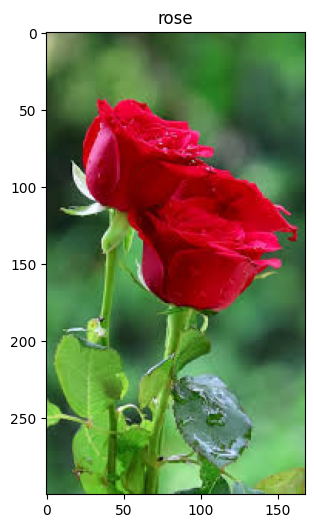

<ipython-input-8-97d7d4aedf72>:12: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(img.ravel(), 256, [0, 256])


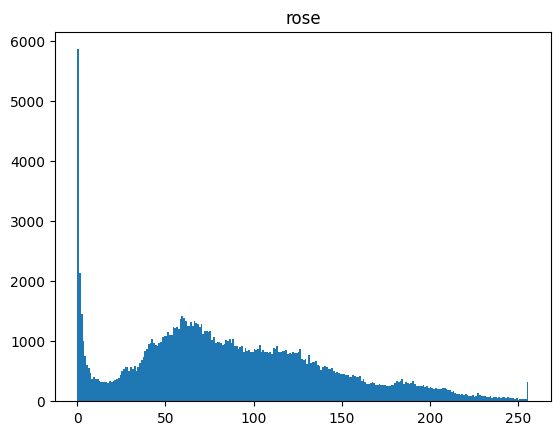

In [8]:
# Loading image
image_path = "rose.jpeg"
img = cv2.imread(image_path)

# Calculating the image name
base_name = os.path.splitext(os.path.basename(image_path))[0]

# Displaying Original Image
imshow(f"{base_name}", img)

# We plot a histogram
plt.hist(img.ravel(), 256, [0, 256])
plt.title(f"{base_name}")
plt.show()

# image.ravel() flattens the 2D/3D array into a 1D array. 256 bins (0-255 intensity values).

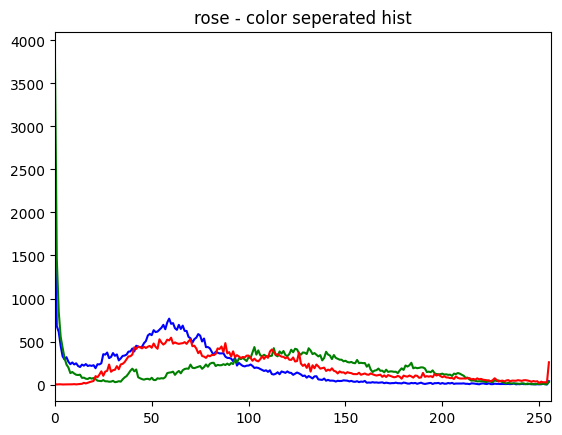

In [9]:
# Viewing Separate Color Channels
color = ('b', 'g', 'r')

# We now separate the colors and plot each in the Histogram
for i, col in enumerate(color):
    histogram2 = cv2.calcHist([img], [i], None, [256], [0, 256])
    plt.plot(histogram2, color = col)
    plt.xlim([0,256])
    plt.title(f"{base_name} - color seperated hist")

plt.show()

##  **2. Tonal Adjustment**

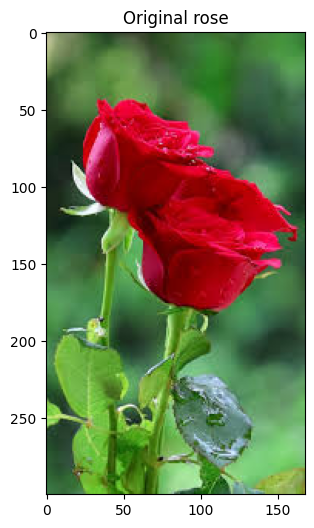

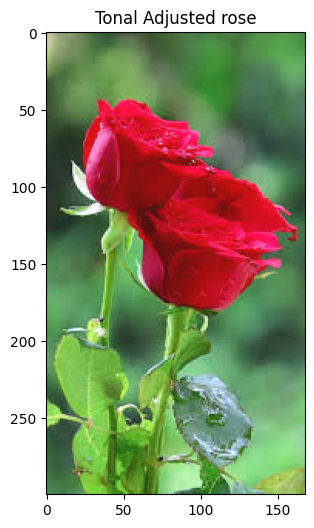

In [15]:
# Function to adjust brightness and contrast
def adjust_tone(image, alpha=1.2, beta=30):
    """
    alpha: Contrast control (1.0-3.0)
    beta: Brightness control (0-100)
    """
    adjusted = cv2.convertScaleAbs(image, alpha=alpha, beta=beta)
    return adjusted

# Apply tonal adjustment
tonal_image = adjust_tone(img, alpha=1, beta=15)

# Show the original and adjusted images
imshow(f'Original {base_name}', img)
imshow(f'Tonal Adjusted {base_name}', tonal_image)

# Save tonal image
cv2.imwrite(f"{base_name}_toned.jpg", tonal_image)

##  **3. Histogram Equalization**

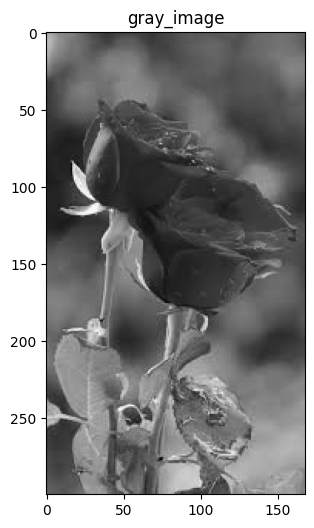

<ipython-input-19-c25f42a25205>:15: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(image.flatten(), 256, [0, 256], color='r', alpha=0.5, label='Histogram')


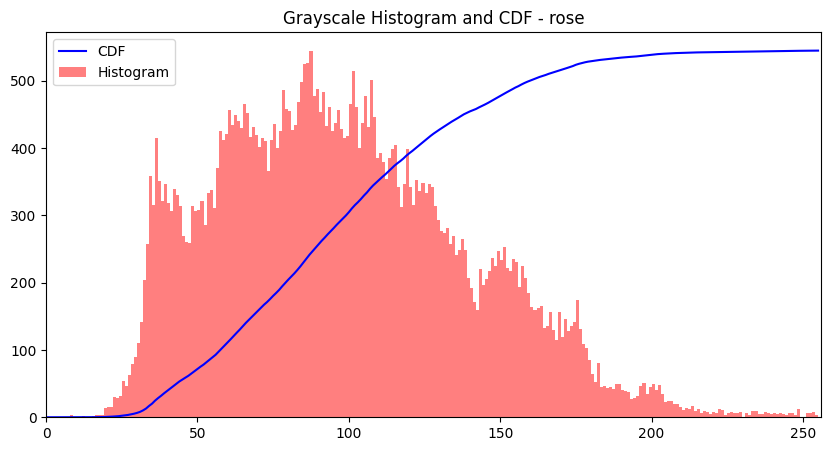

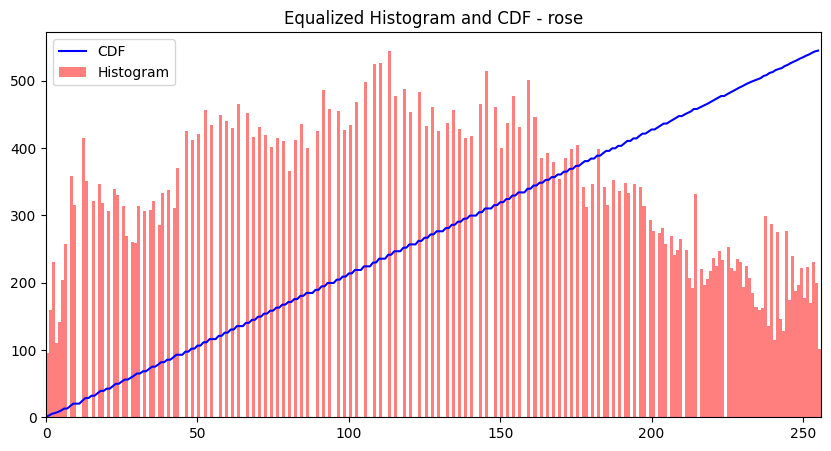

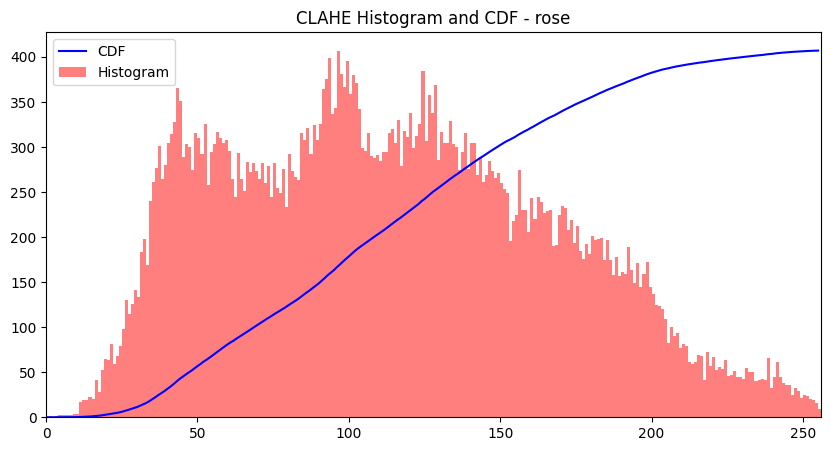

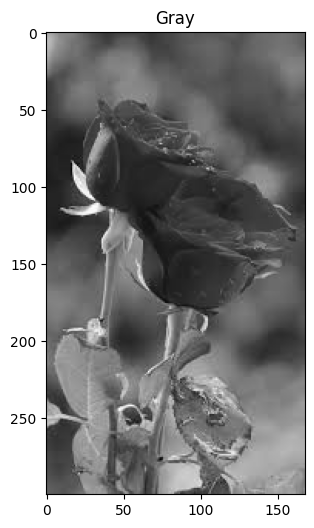

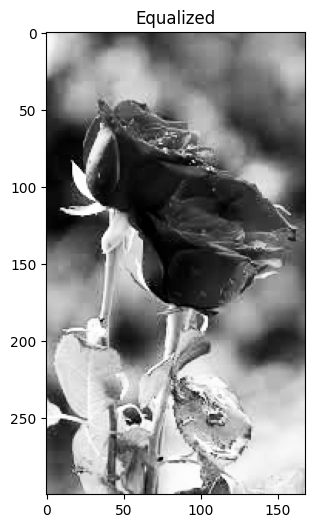

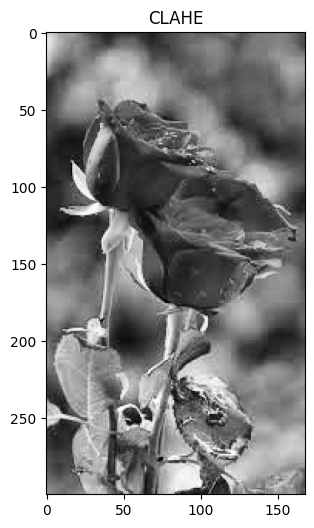

In [19]:
gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
imshow("gray_image", gray_image)

# Save grayscale image
cv2.imwrite(f"output_images/{base_name}_gray.jpg", gray_image)

# Helper to plot histogram and CDF
def plot_hist_cdf(image, title, filename):
    hist, _ = np.histogram(image.flatten(), 256, [0, 256])
    cdf = hist.cumsum()
    cdf_normalized = cdf * float(hist.max()) / cdf.max()

    plt.figure(figsize=(10, 5))
    plt.plot(cdf_normalized, color='b', label='CDF')
    plt.hist(image.flatten(), 256, [0, 256], color='r', alpha=0.5, label='Histogram')
    plt.xlim([0, 256])
    plt.title(title)
    plt.legend(loc='upper left')
    plt.savefig(f"{filename}.png")
    plt.show()

# Plot original grayscale
plot_hist_cdf(gray_image, f"Grayscale Histogram and CDF - {base_name}", f"{base_name}_gray_hist")

# Global Histogram Equalization
equalized_image = cv2.equalizeHist(gray_image)
cv2.imwrite(f"{base_name}_equalized.jpg", equalized_image)
plot_hist_cdf(equalized_image, f"Equalized Histogram and CDF - {base_name}", f"{base_name}_equalized_hist")

# CLAHE (Adaptive)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
clahe_image = clahe.apply(gray_image)
cv2.imwrite(f"{base_name}_clahe.jpg", clahe_image)
plot_hist_cdf(clahe_image, f"CLAHE Histogram and CDF - {base_name}", f"{base_name}_clahe_hist")

# Show results
imshow("Gray", gray_image)
imshow("Equalized", equalized_image)
imshow("CLAHE", clahe_image)